# Test of Sampler

Imports.

In [1]:
%matplotlib widget

import kiruna
import kiruna.sampler as sampler
import kiruna.scene as scene
import kiruna.visualization.scene_visualization as scene_visualization
import matplotlib.pyplot as plt
import numpy
import os
import torch
import utils

Select scene below.

In [2]:
dropdown_widget = utils.get_experiment_info(save_results=False)

RadioButtons(description='Device:', options=('atlas_1.2', 'palau', 'sydney', 'tasman'), value='atlas_1.2')

In [3]:
# Create a scene.
scene_file_name, scene_sampler_file_name = \
    utils.get_configuration_files(dropdown_widget.value)  # type: ignore

et_scene = scene.SceneModel(parameter_file_name=scene_file_name)

subsystem_index = 0
camera_index = 0
num_samples = 3

subsystem = et_scene.device.subsystems[subsystem_index]
camera = subsystem.cameras[camera_index]
resolution = camera.resolution.clone().detach().numpy()

height_in = 6
figsize = [height_in, height_in * resolution[1] / resolution[0]]


## Test Scene Sampler

Scene 1
Scene 2
Scene 3


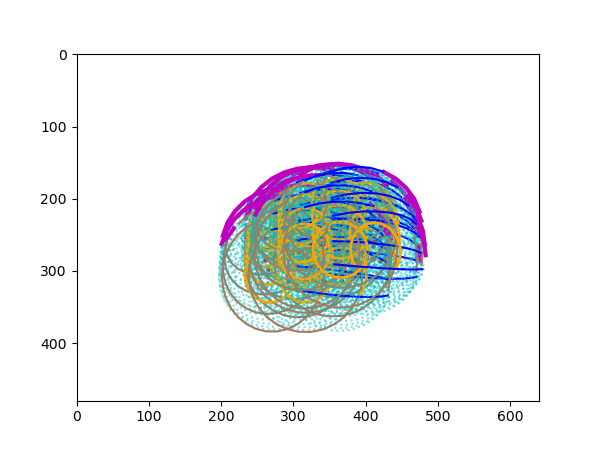

In [4]:
scene_sampler = \
    sampler.SceneSampler(
        et_scene, num_samples, parameter_file_name=scene_sampler_file_name
    )
    
i = 0
H, V = 3, 4
gaze_range_deg = et_scene.device.display_fov.tolist()
h_angles_deg = torch.linspace(-gaze_range_deg[0], gaze_range_deg[0], H) / 2
v_angles_deg = torch.linspace(-gaze_range_deg[1], gaze_range_deg[1], V) / 2

fig = plt.figure(figsize=figsize)
axes_2D = fig.add_subplot()
for sample_scene in scene_sampler.generate_samples():
    i += 1
    print("Scene {0:d}".format(i))
    eye = sample_scene.user.eyes[subsystem_index]
    et_image_visualization = \
        scene_visualization.ImageVisualization(sample_scene, axes_2D)

    for v in range(V):
        for h in range(H):
            # Eye tracking only cares about 80% of the display fov.
            gaze_angle_deg = \
                torch.stack((h_angles_deg[h], v_angles_deg[v]))

            eye.rotate_from_gaze_angles_inParent(gaze_angle_deg)

            et_image_visualization.visualize_refracted_pupil()
            et_image_visualization.visualize_cornea()
            et_image_visualization.visualize_glints()
            et_image_visualization.visualize_limbus()
            et_image_visualization.visualize_eyelids()

            eye.unrotate_from_gaze_angles_inParent(gaze_angle_deg)

## Test User Sampler

User 1
User 2
User 3


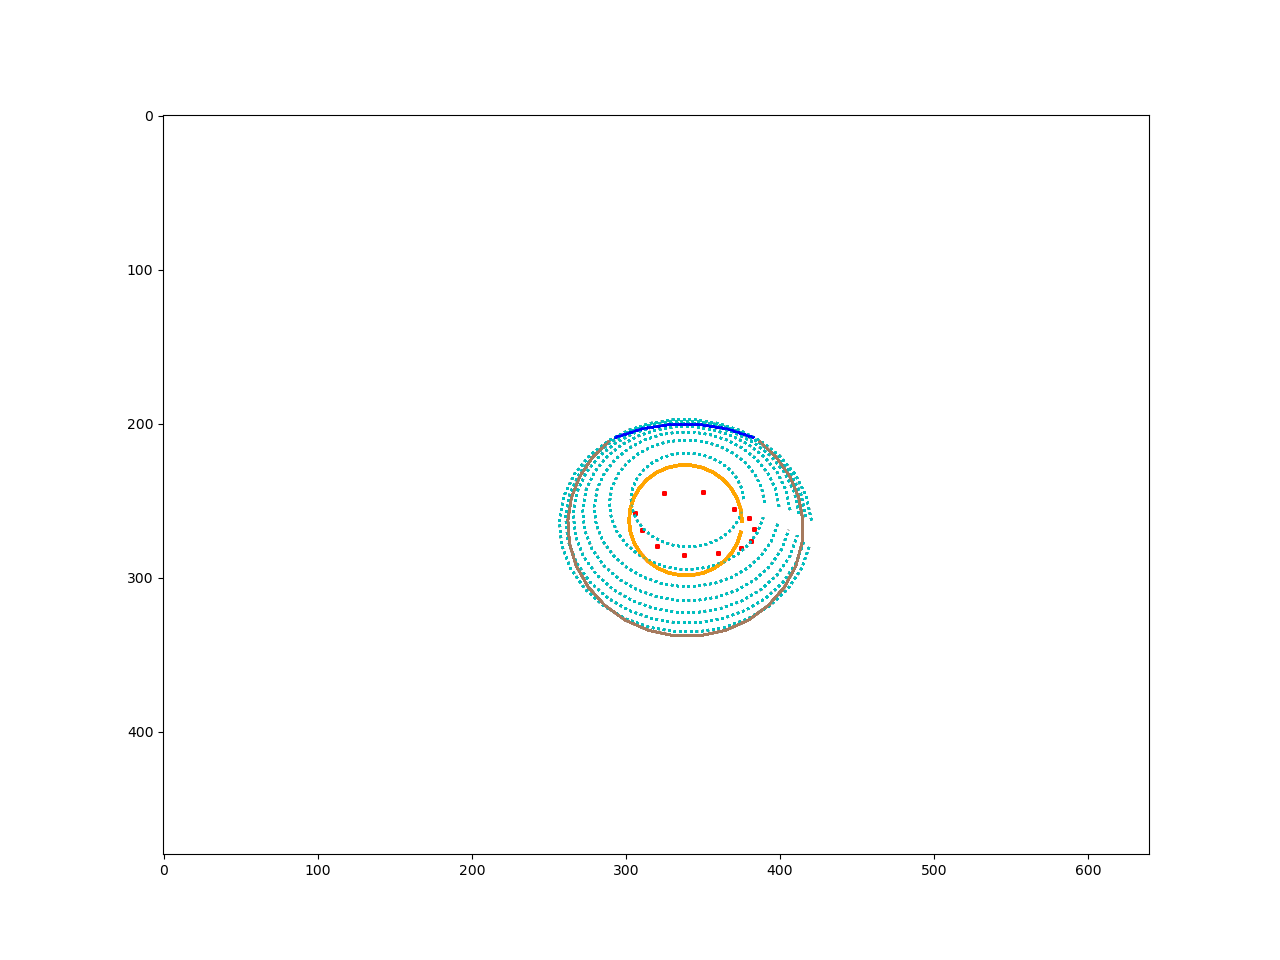

In [5]:
user_sampler_file_name = \
    scene_sampler.sampler_parameters[
        "user sampling parameters"
    ]["parameter file"]
user_sampler_file_name = \
    os.path.join(sampler.SAMPLER_DIR, user_sampler_file_name)

user_sampler = \
    sampler.UserSampler(
        et_scene.user, num_samples, parameter_file_name=user_sampler_file_name
    )

H, V = 5, 4
gaze_range_deg = et_scene.device.display_fov.clone().detach().numpy()
h_angles_deg = torch.linspace(-gaze_range_deg[0], gaze_range_deg[0], H) / 2
v_angles_deg = torch.linspace(-gaze_range_deg[1], gaze_range_deg[1], V) / 2

fig = plt.figure(figsize=resolution / 50)
axes_2D = fig.add_subplot()
for i, user_sample in enumerate(user_sampler.generate_samples()):
    print("User {0:d}".format(i + 1))
    eye = user_sample.eyes[subsystem_index]
    et_image_visualization = \
        scene_visualization.ImageVisualization(user_sample.parent, axes_2D)

    for v in range(V):
        for h in range(H):
            # Eye tracking only cares about 80% of the display fov.
            gaze_angle_deg = \
                torch.stack((h_angles_deg[h], v_angles_deg[v]))

            eye.rotate_from_gaze_angles_inParent(gaze_angle_deg)

            et_image_visualization.visualize_refracted_pupil()
            et_image_visualization.visualize_cornea()
            et_image_visualization.visualize_glints()
            et_image_visualization.visualize_limbus()
            et_image_visualization.visualize_eyelids()

            eye.unrotate_from_gaze_angles_inParent(gaze_angle_deg)

## Test Device Sampler

Device 1
Device 2
Device 3


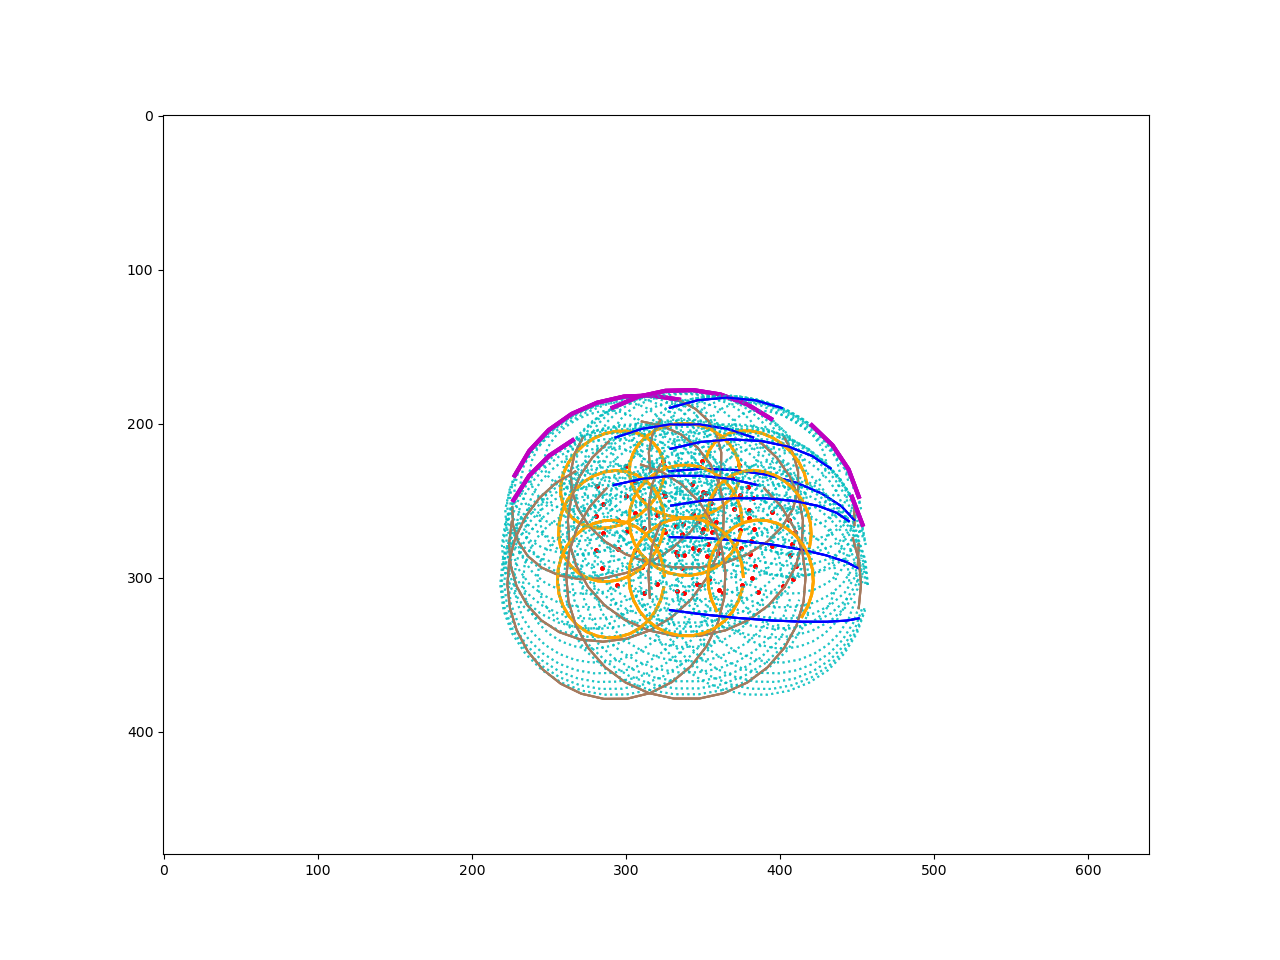

In [6]:
fig = plt.figure(figsize=resolution / 50)
axes_2D = fig.add_subplot()

device_sampler_file_name = \
    scene_sampler.sampler_parameters[
        "device sampling parameters"
    ]["parameter file"]
device_sampler_file_name = \
    os.path.join(sampler.SAMPLER_DIR, device_sampler_file_name)

device_sampler = \
    sampler.DeviceSampler(
        et_scene.device,
        num_samples,
        parameter_file_name=device_sampler_file_name
    )
i = 0
H, V = 3, 3
h_angles_deg = torch.linspace(-gaze_range_deg[0], gaze_range_deg[0], H) / 2
v_angles_deg = torch.linspace(-gaze_range_deg[1], gaze_range_deg[1], V) / 2

for device_sample in device_sampler.generate_samples():
    i += 1
    print("Device {0:d}".format(i))
    eye = device_sample.parent.user.eyes[subsystem_index]
    et_image_visualization = \
        scene_visualization.ImageVisualization(device_sample.parent, axes_2D)

    for v in range(V):
        for h in range(H):
            # Eye tracking only cares about 80% of the display fov.
            gaze_angle_deg = \
                torch.stack((h_angles_deg[h], v_angles_deg[v]))

            eye.rotate_from_gaze_angles_inParent(gaze_angle_deg)

            et_image_visualization.visualize_refracted_pupil()
            et_image_visualization.visualize_cornea()
            et_image_visualization.visualize_glints()
            et_image_visualization.visualize_limbus()
            et_image_visualization.visualize_eyelids()

            eye.unrotate_from_gaze_angles_inParent(gaze_angle_deg)